# **bank marketing Classification**

ในโปรเจ็คนี้จะเป็นการสร้าง Machine Learning model จากหลากหลาย Algorithm เพื่อทำนายลูกค้าที่จะเข้าร่วมแคมเปญการตลาดของทางธนาคาร Portuguese bank จากข้อมูล bank maketing

**Content**

1. Import data and python packages

2. Variable Description 

3. Read Dataset

4. Exploratory Data Analysis

5. Data Preprocessing

    * Data Cleaning
    * Feature engineering
    * Split data
    * Scalling data
 
6. Machine learning model

    * K-Near Neighbors
    * Logistic regression
    * Naive bayes
    * Decision tree
    * Random forest
    * XGBClassifier

7. Conclusion

## **1. Import data and python packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

### **2. Variable Description**

**Input variables:**

 * ข้อมูลค้าธนาคาร:

    1 - age: อายุ (numeric)

    2 - job : อาชีพ (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

    3 - marital : สถานภาพสมรส (categorical: 'divorced','married','single','unknown')

    4 - education : การศึกษา (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

    5 - default: มีประวัติการผิดสัญญาหรือไม่? (categorical: 'no','yes','unknown')

    6 - housing: มีการกู้ซื้อบ้านหรือไม่? (categorical: 'no','yes','unknown')

    7 - loan: มีสินเชื่อส่วนบุคคลหรือไม่? (categorical: 'no','yes','unknown')

* เกี่ยวกับการติดต่อล่าสุดของแคมเปญปัจจุบัน:

    8 - contact: รูปแบบการติดต่อ (categorical: 'cellular','telephone')
    
    9 - month: เดือนที่ติดต่อกันล่าสุด (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
    10 - day_of_week: สัปดาห์ที่ติดต่อกันล่าสุด (categorical: 'mon','tue','wed','thu','fri')
    
    11 - duration: ระยะเวลาระหว่างการติดต่อล่าสุด, in seconds (numeric). หมายเหตุสำคัญ :แอตทริบิวต์นี้มีผลต่อ output target เป็นอย่างมาก (เช่น ถ้า duration=0 ดังนั้น y='no') ดังนั้นเราจะไม่รู้ระยะเวลาก่อนที่จะมีการติดต่อ หลังจากสิ้นสุดการติดต่อจะสามารถรู้ผลลัพท์ได้อย่างชัดเจน ดังนั้น input นี้ควรอยู่ในวัตถุประสงค์และไม่ควรถูกตัดทิ้ง ถ้ายังตั้งใจที่จะสร้างโมเดลการทำนายที่เป็นจริงมากที่สุด


* แอตทริบิวต์อื่นๆ:

    12 - campaign: จำนวนผู้ทำการติดต่อที่ใช้สำหรับแคมเปญนี้และสำหรับลูกค้ารายนี้ (numeric, ประกอบด้วยการติดต่อล่าสุด)
    
    13 - pdays: จำนวนวันที่ผ่านมาโดยนับหลังจากลูกค้าติดต่อครั้งสุดท้ายในแคมเปญก่อนหน้านี้ (numeric; 999 หมายถึงลูกค้าไม่ได้มีการติดต่อก่อนหน้านี้)
    
    14 - previous: จำนวนผู้ทำการติดต่อก่อนแคมเปญนี้และสำหรับลูกค้ารายนี้ (numeric)
  
    15 - poutcome: ผลของแคมเปญทางการตลาอดก่อหน้านี้ (categorical: 'failure','nonexistent','success')

* แอตทริบิวต์เกี่ยวกับบริบททางสังคมและเศรษฐกิจ 

    16 - emp.var.rate: อัตราการเปลี่ยนแปลงการจ้างงาน  - ตัวบ่งชี้รายไตรมาส (numeric)
    
    17 - cons.price.idx: ดัชนีราคาผู้บริโภค  - ตัวบ่งชี้รายเดือน (numeric)
    
    18 - cons.conf.idx: ดัชนีความเชื่อมั่นของผู้บริโภค  - ตัวบ่งชี้รายเดือน (numeric)
    
    19 - euribor3m: อัตรา euribor ระยะ3เดือน - ตัวบ่งชี้รายวัน  (numeric)
    
    20 - nr.employed: จำนวนพนักงาน - ตัวบ่งชี้รายไตรมาส (numeric)

**Output variable (desired target):**

21 - y - มีลูกค้าสมัครฝากเงินประจำหรือไม่? (binary: 'yes','no')



## 3. Read Dataset

ข้อมูลจาก [Machine Learning Respository](https://archive.ics.uci.edu/ml/index.php) สามารถ download ผ่าน [
Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

In [3]:
bank_additiona_full = pd.read_csv('/content/drive/My Drive/datasets/bank/bank-additional/bank-additional-full.csv', sep=';')
bank_additiona_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print('Shape of dataset :', bank_additiona_full.shape)


Shape of dataset : (41188, 21)


### **4. Exploratory Data Analysis**

ขั้นตอนที่สำคัญคือการสำรวจและทำความเข้าใจข้อมูลก่อนก่อนที่จะนำข้อมูลเข้าไปสู่ในกระบวนการถัดไปคือการเตรียมข้อมูล

ตรวจสอบชนิดของข้อมูลก่อน 

In [5]:
bank_additiona_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

สรุปข้อมูลทางสถิติของ Columns ชนิด Numerical data

In [6]:
bank_additiona_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


ตรวจสอบข้อมูลชนิด Categorical data

In [ ]:
for col in bank_additiona_full.select_dtypes(include='object').columns:
    print(col)
    print(bank_additiona_full[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


ดูการกระจายตัวของข้อมูลด้วย pairplot

<Figure size 1440x1440 with 0 Axes>

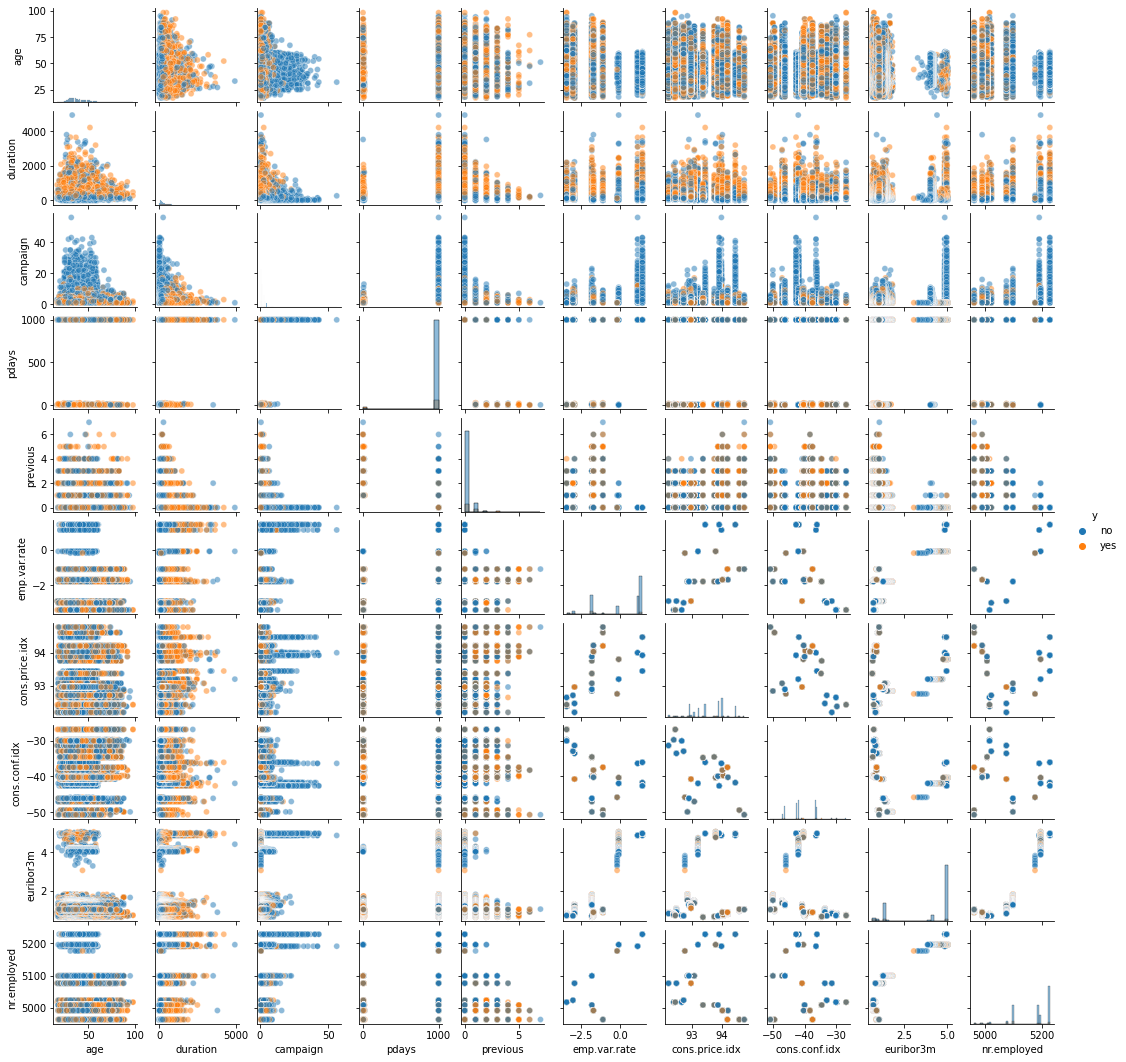

In [ ]:
plt.figure(figsize=[20,20])
sns.pairplot(bank_additiona_full, diag_kind='hist',  hue= 'y', height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})

เปรียบเทียบจำนวน label กับแต่ละ column จะเห็นว่าโดยส่วนการตอบรับแคมเปญจากลูกค้าจะเป็น 'no'

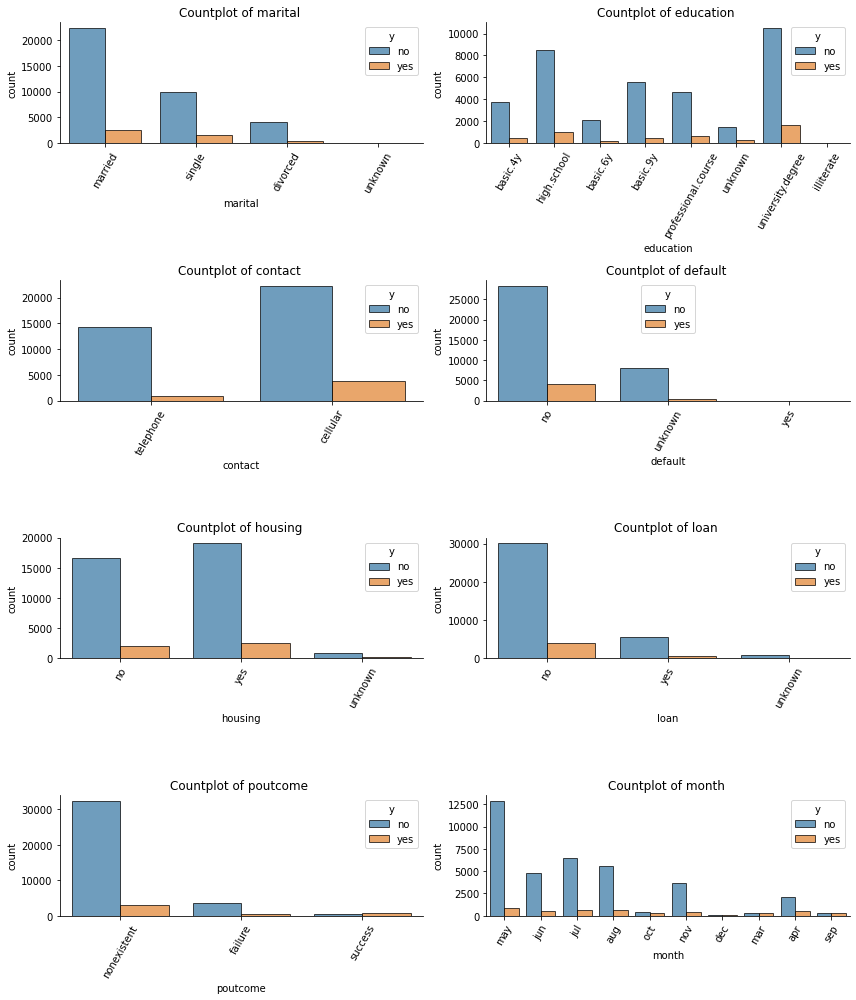

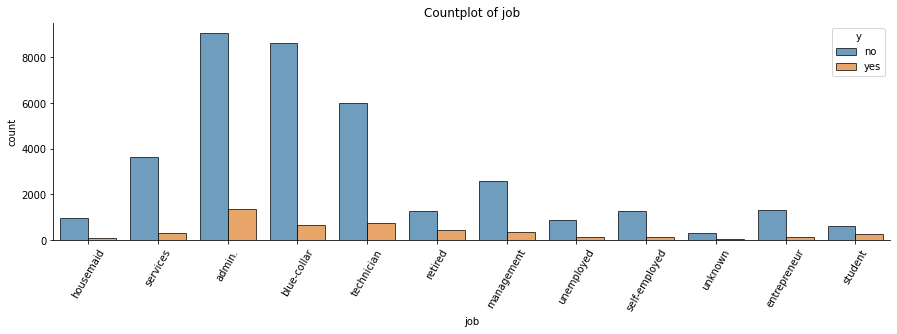

In [ ]:
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=bank_additiona_full)
    sns.despine()
    plt.title("Countplot of {} ".format(f))
    n=n+1
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


    
plt.figure(figsize=[15,4])
sns.countplot(x='job', hue='y',edgecolor="black", alpha=0.7, data=bank_additiona_full)
sns.despine()
plt.title("Countplot of job")
_ = plt.xticks(rotation=60)
plt.show()


## **5. Data Preprocessing**

ก่อนที่จะนำข้อมูลนั้นเข้าไปเทรนกับ machine learning จำเป็นจะต้องทำความสะอาดข้อมูล และปรับเปลี่ยนโครงสร้างของข้อมูลก่อน เพื่อทำให้การทำงานของ machine learning สามารถทำได้งานดียิ่งขึ้น

### **Data Cleaning**

ตรวจสอบข้อมูลที่เป็น NaN 

In [7]:
print(bank_additiona_full.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


ลบข้อมูลที่ซ้ำกันออก

In [8]:
print(bank_additiona_full.duplicated().sum())

12


In [9]:
bank_additiona_full = bank_additiona_full.drop_duplicates()
print(bank_additiona_full.shape)

(41176, 21)


### **Feature engineering**

  * ทำเปลี่ยนข้อมูลชนิด Categorical ให้อยู่ในรูปแบบของตัวเลขด้วย One-Hot encoding โดยการใช้ Dummy Variable Encoding 
  * ในส่วนของ label ใช้ Label encoder ในการเปรียบข้อมูลจาก 'yes' และ 'no' เป็น 1 และ 0



In [12]:
X = pd.get_dummies(bank_additiona_full.drop('y', axis=1), 
                       prefix=bank_additiona_full.drop('y', axis=1).select_dtypes(include='object').columns)

LE=LabelEncoder()
y = LE.fit_transform(bank_additiona_full['y'])

### **Split data**

แบ่งข้อมูลเป็น train และ test สำหรับการใช้ในการตรวจสอบความถูกต้องของข้อมูล

In [14]:
bank_train, bank_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)


### **Scalling data**

จากการตรวจสอบข้อมูลก่อนที่จะทำการ Data Preprocessing จะเห็นได้ว่าข้อมูลที่อยู่ในรูปแบบของ Numerical จะมีความห่างของตัวเลขที่สูง จึงจำเป็นต้องทำการ Scalling เพื่อทำให้การเทรนโมเดลนั้นมีประสิทธิภาพที่สูงขึ้น

In [15]:
columns_con = bank_additiona_full.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_scaler_train = scaler.fit_transform(bank_train.select_dtypes(include=['int64', 'float64']))
X_scaler_train_df = pd.DataFrame(X_scaler_train, columns=columns_con)

X_scaler_test = scaler.transform(bank_test.select_dtypes(include=['int64', 'float64']))
X_scaler_test_df  = pd.DataFrame(X_scaler_test, columns=columns_con)

X_train = pd.concat([X_scaler_train_df, bank_train.select_dtypes(include='uint8').reset_index()], axis=1)
X_test = pd.concat([X_scaler_test_df, bank_test.select_dtypes(include='uint8').reset_index()], axis=1)


## **Machine learning model**

### K-Near Neighbors

ลองทดสอบเทรนข้อมูลกับโมเดล K-Near Neighbors และปรับ parameter ผ่านจำนวนของ n_neighbors

In [ ]:
neighbors = np.arange(1, 27)
accuracy_train = np.empty(len(neighbors))
accuracy_test = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    accuracy_train[i] = accuracy_score(y_train, knn.predict(X_train))
    accuracy_test[i] = accuracy_score(y_test, knn.predict(X_test))

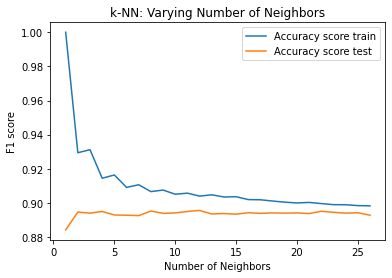

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, accuracy_train, label = 'Accuracy score train')
plt.plot(neighbors, accuracy_test, label = 'Accuracy score test')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 score')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

print('accuracy train :',knn.score(X_train, y_train))
print('accuracy test :',knn.score(X_test, y_test))
print('Precision score : ', precision_score(y_test, knn.predict(X_test)))
cm_knn = confusion_matrix(y_test, knn.predict(X_test))
print(cm_knn)

accuracy train : 0.904735883424408
accuracy test : 0.8935162700339971
Precision score :  0.5545454545454546
[[7115  196]
 [ 681  244]]


### **Logistic regression**

เทรนโมเดลด้วย Logistic regression

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

print('accuracy train :',log.score(X_train, y_train))
print('accuracy test :',log.score(X_test, y_test))
print('Precision score : ', precision_score(y_test, log.predict(X_test)))
cm_log= confusion_matrix(y_test, log.predict(X_test))
print(cm_log)

accuracy train : 0.9069216757741347
accuracy test : 0.9089363768819816
Precision score :  0.6480541455160744
[[7103  208]
 [ 542  383]]


### Naive bayes

เทรนโมเดลด้วย Naive bayes โดยใช้ Gaussian Naive bayes 

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

print('accuracy train :',GNB.score(X_train, y_train))
print('accuracy test :',GNB.score(X_test, y_test))
print('Precision score : ', precision_score(y_test, GNB.predict(X_test)))
cm_GNB = confusion_matrix(y_test, GNB.predict(X_test))
print(cm_GNB)

accuracy train : 0.8529751062537948
accuracy test : 0.8494414764448761
Precision score :  0.38660907127429806
[[6459  852]
 [ 388  537]]


### **Decision tree**

ลองทดสอบเทรนข้อมูลกับโมเดล K-Near Neighbors และปรับ parameter ด้วยการใช้ Grid Search

In [ ]:
dtc = DecisionTreeClassifier()

params_dtc = {
            'max_depth':[2,3,4,5],
            'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
            'criterion':['gini', 'entropy']
            }

grid_dtc = GridSearchCV(estimator=dtc,
                       param_grid=params_dtc,
                       scoring='accuracy',
                       cv=5,
                       n_jobs=-1)           

grid_dtc.fit(X_train, y_train)

print("Best parameters found: ", grid_dtc.best_params_)

best_dtc = grid_dtc.best_estimator_
print('accuracy train :',best_dtc.score(X_train, y_train))
print('accuracy test :',best_dtc.score(X_test, y_test))
print('Precision score : ', precision_score(y_test, best_dtc.predict(X_test)))
cm_dtc = confusion_matrix(y_test, best_dtc.predict(X_test))
print(cm_dtc)


Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}
accuracy train : 0.9182452944748026
accuracy test : 0.9161000485672657
Precision score :  0.6568364611260054
[[7055  256]
 [ 435  490]]


### **Random forest**

ลองทดสอบเทรนข้อมูลกับโมเดล Random forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=3, max_features=0.5)
rf.fit(X_train, y_train)

print('accuracy train :',rf.score(X_train, y_train))
print('accuracy test :',rf.score(X_test, y_test))
print('Precision score : ', precision_score(y_test, rf.predict(X_test)))
cm_rf= confusion_matrix(y_test, rf.predict(X_test))
print(cm_rf)

accuracy train : 0.981845780206436
accuracy test : 0.9176784847013113
Precision score :  0.6561314791403287
[[7039  272]
 [ 406  519]]


### **XGBClassifier**

ลองทดสอบเทรนข้อมูลกับโมเดล  Extreme Gradient Boosting

In [ ]:
gbc = xgb.XGBClassifier( n_estimators=1000, min_child_weight= 5, max_depth= 5, learning_rate= 0.25, colsample_bytree= 0.3)
gbc.fit(X_train, y_train)
print('accuracy train :',gbc.score(X_train, y_train))
print('accuracy test :',gbc.score(X_test, y_test))
print('Precision score : ', precision_score(y_test, gbc.predict(X_test)))
cm_xgb = confusion_matrix(y_test, gbc.predict(X_test))
print(cm_xgb)

accuracy train : 0.978749241044323
accuracy test : 0.9141573579407479
Precision score :  0.6383248730964467
[[7026  285]
 [ 422  503]]


## **Evaluation**

### **Accuracy**

In [ ]:
best_model = [rf ,log ,gbc, knn, GNB, best_dtc]
best_accuracy_train = np.empty(len(best_model))
best_accuracy_test = np.empty(len(best_model))
best_precision_score = np.empty(len(best_model))

for i,model in enumerate(best_model):
  best_accuracy_train[i] = model.score(X_train, y_train)
  best_accuracy_test[i] = model.score(X_test, y_test)
  best_precision_score[i] = precision_score(y_test, model.predict(X_test))


In [ ]:
score = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Logistic regression', 'XGBoost',
                           'K-Near Neighbors', 'Gausian NB',  'Decision Tree Classifier'],
                'Accuracy_Score_Train':  best_accuracy_train,
                'Accuracy_Score_Test':  best_accuracy_test,
                'Precision_Score':  best_precision_score})
score = score.sort_values(by='Accuracy_Score_Train',ascending=False)
score


,Models,Accuracy_Score_Train,Accuracy_Score_Test,Precision_Score
0,Random Forest Classifier,0.981846,0.917678,0.656131
2,XGBoost,0.978749,0.914157,0.638325
5,Decision Tree Classifier,0.918245,0.916100,0.656836
1,Logistic regression,0.906922,0.908936,0.648054
3,K-Near Neighbors,0.904736,0.893516,0.554545
4,Gausian NB,0.852975,0.849441,0.386609


### **ROC Curve**

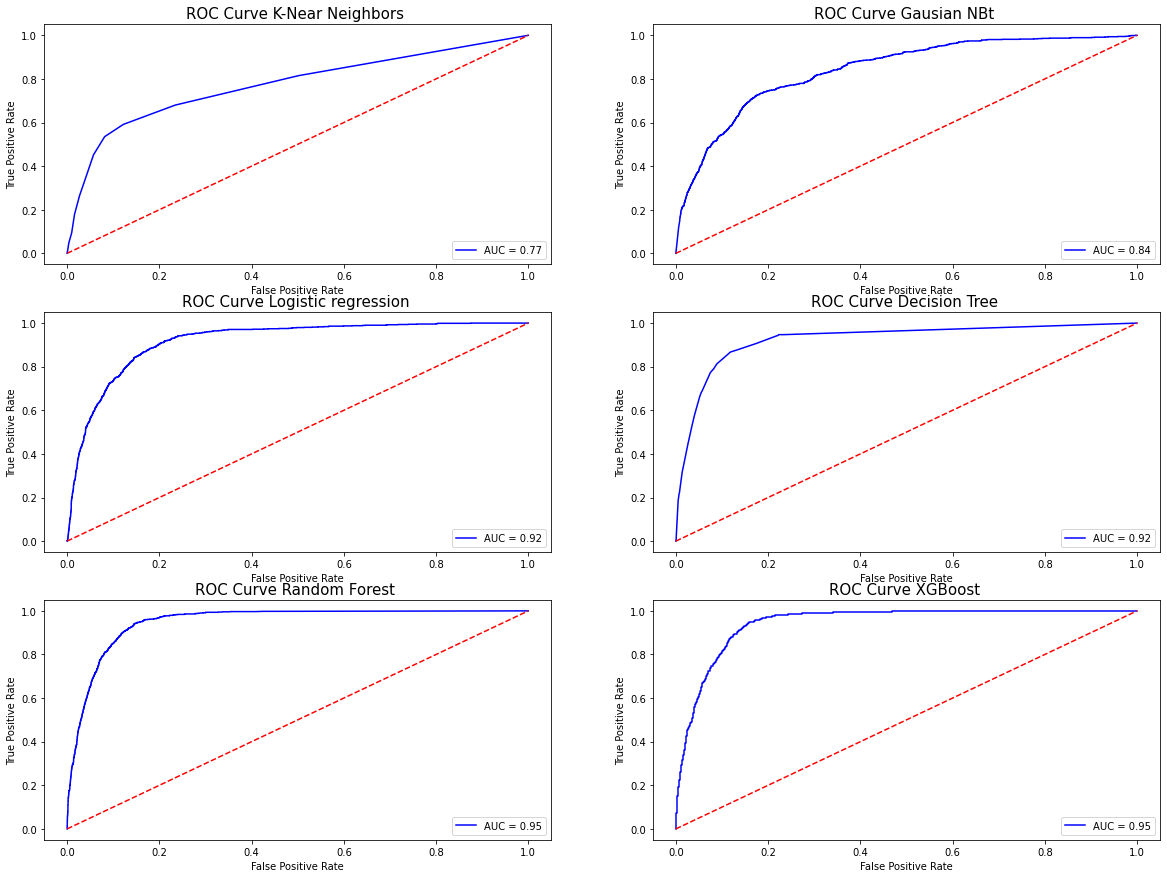

In [ ]:
from sklearn.metrics import roc_curve, auc
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (20,15))

#K-Near Neighbors
predicted_probas_knn = knn.predict_proba(X_test)
predicted_probas_knn = predicted_probas_knn[:,1]
fpr_knn, tpr_knn, threshold_knn= roc_curve(y_test, predicted_probas_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
ax1.plot(fpr_knn, tpr_knn, 'b', label = 'AUC = %0.2f' % roc_auc_knn)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('ROC Curve K-Near Neighbors ',fontsize=15)
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.legend(loc = 'lower right')

#Gausian NB
predicted_probas_GNB = GNB.predict_proba(X_test)
predicted_probas_GNB= predicted_probas_GNB[:,1]
fpr_GNB, tpr_GNB, threshold_rf = roc_curve(y_test, predicted_probas_GNB)
roc_auc_GNB = auc(fpr_GNB, tpr_GNB)
ax2.plot(fpr_GNB, tpr_GNB, 'b', label = 'AUC = %0.2f' % roc_auc_GNB)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_title('ROC Curve Gausian NBt ',fontsize=15)
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')
ax2.legend(loc = 'lower right')

#Logistic regression Classifier
predicted_probas_log = log.predict_proba(X_test)
predicted_probas_log= predicted_probas_log[:,1]
fpr_log, tpr_log, threshold_log = roc_curve(y_test, predicted_probas_log)
roc_auc_log= auc(fpr_log, tpr_log)
ax3.plot(fpr_log, tpr_log, 'b', label = 'AUC = %0.2f' % roc_auc_log)
ax3.plot([0, 1], [0, 1],'r--')
ax3.set_title('ROC Curve Logistic regression ',fontsize=15)
ax3.set_ylabel('True Positive Rate')
ax3.set_xlabel('False Positive Rate')
ax3.legend(loc = 'lower right')

#Decision Tree Classifier
predicted_probas_dtc = best_dtc.predict_proba(X_test)
predicted_probas_dtc= predicted_probas_dtc[:,1]
fpr_dtc, tpr_dtc, threshold_dtc= roc_curve(y_test, predicted_probas_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
ax4.plot(fpr_dtc, tpr_dtc, 'b', label = 'AUC = %0.2f' % roc_auc_dtc)
ax4.plot([0, 1], [0, 1],'r--')
ax4.set_title('ROC Curve Decision Tree ',fontsize=15)
ax4.set_ylabel('True Positive Rate')
ax4.set_xlabel('False Positive Rate')
ax4.legend(loc = 'lower right')

#Random Forest Classifier
predicted_probas_rf = rf.predict_proba(X_test)
predicted_probas_rf = predicted_probas_rf[:,1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, predicted_probas_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
ax5.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
ax5.plot([0, 1], [0, 1],'r--')
ax5.set_title('ROC Curve Random Forest ',fontsize=15)
ax5.set_ylabel('True Positive Rate')
ax5.set_xlabel('False Positive Rate')
ax5.legend(loc = 'lower right')

#XGBoost
predicted_probas_xgb = gbc.predict_proba(X_test)
predicted_probas_xgb = predicted_probas_xgb[:,1]
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, predicted_probas_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
ax6.plot(fpr_xgb, tpr_xgb, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
ax6.plot([0, 1], [0, 1],'r--')
ax6.set_title('ROC Curve XGBoost ',fontsize=15)
ax6.set_ylabel('True Positive Rate')
ax6.set_xlabel('False Positive Rate')
ax6.legend(loc = 'lower right')

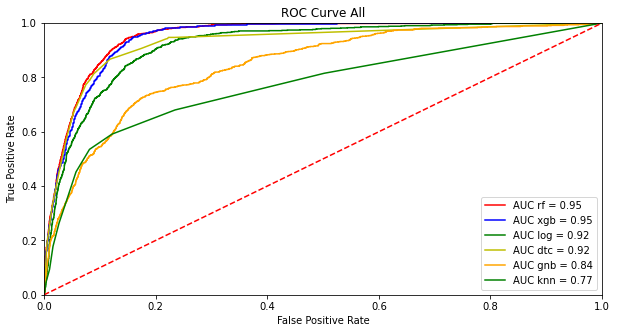

In [ ]:
plt.figure(figsize=(10,5))
plt.title('ROC Curve All')
plt.plot(fpr_rf, tpr_rf, 'r', label = 'AUC rf = %0.2f' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, 'b', label = 'AUC xgb = %0.2f' % roc_auc_xgb)
plt.plot(fpr_log, tpr_log, 'g', label = 'AUC log = %0.2f' % roc_auc_log)
plt.plot(fpr_dtc, tpr_dtc, 'y', label = 'AUC dtc = %0.2f' % roc_auc_dtc)
plt.plot(fpr_GNB, tpr_GNB, 'orange', label = 'AUC gnb = %0.2f' % roc_auc_GNB)
plt.plot(fpr_knn, tpr_knn, 'g', label = 'AUC knn = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## **Conclusion**

จากผลการประเมินประสิทธิภาพการทำงานของโมเดลหลายๆตัวจะพบว่า หลายๆโมเดลสามารถทำงานได้ดี โมเดลที่ทำได้ดีดีที่สุดคือ Random Forest และ XGboost ในส่วนของโมลเดล Gaussian Naive bayes จะมีประสิทธิภาพที่แย่ที่สุดของจากทั้ง 6 โมเดลนี้